Problem Statement-2

In [1]:
#import neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import f_oneway

In [2]:
# Load and show the dataset
df = pd.read_csv('used_cars_data.csv',nrows=700000,low_memory=False)
df.head(10)

vin back_legroom  bed bed_height bed_length        body_type  \
0  ZACNJABB5KPJ92081      35.1 in  NaN        NaN        NaN  SUV / Crossover   
1  SALCJ2FX1LH858117      38.1 in  NaN        NaN        NaN  SUV / Crossover   
2  JF1VA2M67G9829723      35.4 in  NaN        NaN        NaN            Sedan   
3  SALRR2RV0L2433391      37.6 in  NaN        NaN        NaN  SUV / Crossover   
4  SALCJ2FXXLH862327      38.1 in  NaN        NaN        NaN  SUV / Crossover   
5  SALYK2EX1LA261711      37.1 in  NaN        NaN        NaN  SUV / Crossover   
6  3MZBPABL6KM107908      35.1 in  NaN        NaN        NaN            Sedan   
7  SALYK2EX5LA275434      37.1 in  NaN        NaN        NaN  SUV / Crossover   
8  SALCJ2FX6LH858128      38.1 in  NaN        NaN        NaN  SUV / Crossover   
9  SALZL2GX4LH007593      33.8 in  NaN        NaN        NaN  SUV / Crossover   

  cabin      city  city_fuel_economy  combine_fuel_economy  ...  transmission  \
0   NaN   Bayamon                NaN                   NaN  ...             A   
1   NaN  San Juan                NaN                   NaN  ...             A   
2   NaN  Guaynabo               17.0                   NaN  ...             M   
3   NaN  San Juan                NaN                   NaN  ...             A   
4   NaN  San Juan                NaN                   NaN  ...             A   
5   NaN  San Juan                NaN                   NaN  ...             A   
6   NaN   Bayamon                NaN                   NaN  ...             A   
7   NaN  San Juan                NaN                   NaN  ...             A   
8   NaN  San Juan                NaN                   NaN  ...             A   
9   NaN  San Juan                NaN                   NaN  ...             A   

          transmission_display  trimId              trim_name  \
0  9-Speed Automatic Overdrive  t83804           Latitude FWD   
1  9-Speed Automatic Overdrive  t86759                  S AWD   
2               6-Speed Manual  t58994                   Base   
3  8-Speed Automatic Overdrive  t86074             V6 HSE AWD   
4  9-Speed Automatic Overdrive  t86759                  S AWD   
5  8-Speed Automatic Overdrive  t85614   P250 R-Dynamic S AWD   
6  6-Speed Automatic Overdrive  t85256              Sedan FWD   
7  8-Speed Automatic Overdrive  t85614   P250 R-Dynamic S AWD   
8  9-Speed Automatic Overdrive  t86759                  S AWD   
9  9-Speed Automatic Overdrive  t85531  P300 R-Dynamic SE AWD   

   vehicle_damage_category wheel_system wheel_system_display wheelbase  \
0                      NaN          FWD    Front-Wheel Drive  101.2 in   
1                      NaN          AWD      All-Wheel Drive  107.9 in   
2                      NaN          AWD      All-Wheel Drive  104.3 in   
3                      NaN          AWD      All-Wheel Drive    115 in   
4                      NaN          AWD      All-Wheel Drive  107.9 in   
5                      NaN          AWD      All-Wheel Drive  113.1 in   
6                      NaN          FWD    Front-Wheel Drive  107.3 in   
7                      NaN          AWD      All-Wheel Drive  113.1 in   
8                      NaN          AWD      All-Wheel Drive  107.9 in   
9                      NaN          AWD      All-Wheel Drive  105.6 in   

     width  year  
0  79.6 in  2019  
1  85.6 in  2020  
2  78.9 in  2016  
3  87.4 in  2020  
4  85.6 in  2020  
5  84.4 in  2020  
6  70.7 in  2019  
7  84.4 in  2020  
8  85.6 in  2020  
9  82.7 in  2020  

[10 rows x 66 columns]

In [3]:
#print the columns type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      700000 non-null  object 
 1   back_legroom             666225 non-null  object 
 2   bed                      4113 non-null    object 
 3   bed_height               79422 non-null   object 
 4   bed_length               79422 non-null   object 
 5   body_type                696987 non-null  object 
 6   cabin                    13502 non-null   object 
 7   city                     700000 non-null  object 
 8   city_fuel_economy        587717 non-null  float64
 9   combine_fuel_economy     0 non-null       float64
 10  daysonmarket             700000 non-null  int64  
 11  dealer_zip               700000 non-null  object 
 12  description              680077 non-null  object 
 13  engine_cylinders         679517 non-null  object 
 14  engi

In [4]:
#check the total null values
df.isnull().sum()

vin                          0
back_legroom             33775
bed                     695887
bed_height              620578
bed_length              620578
                         ...  
wheel_system             31825
wheel_system_display     31825
wheelbase                33775
width                    33775
year                         0
Length: 66, dtype: int64

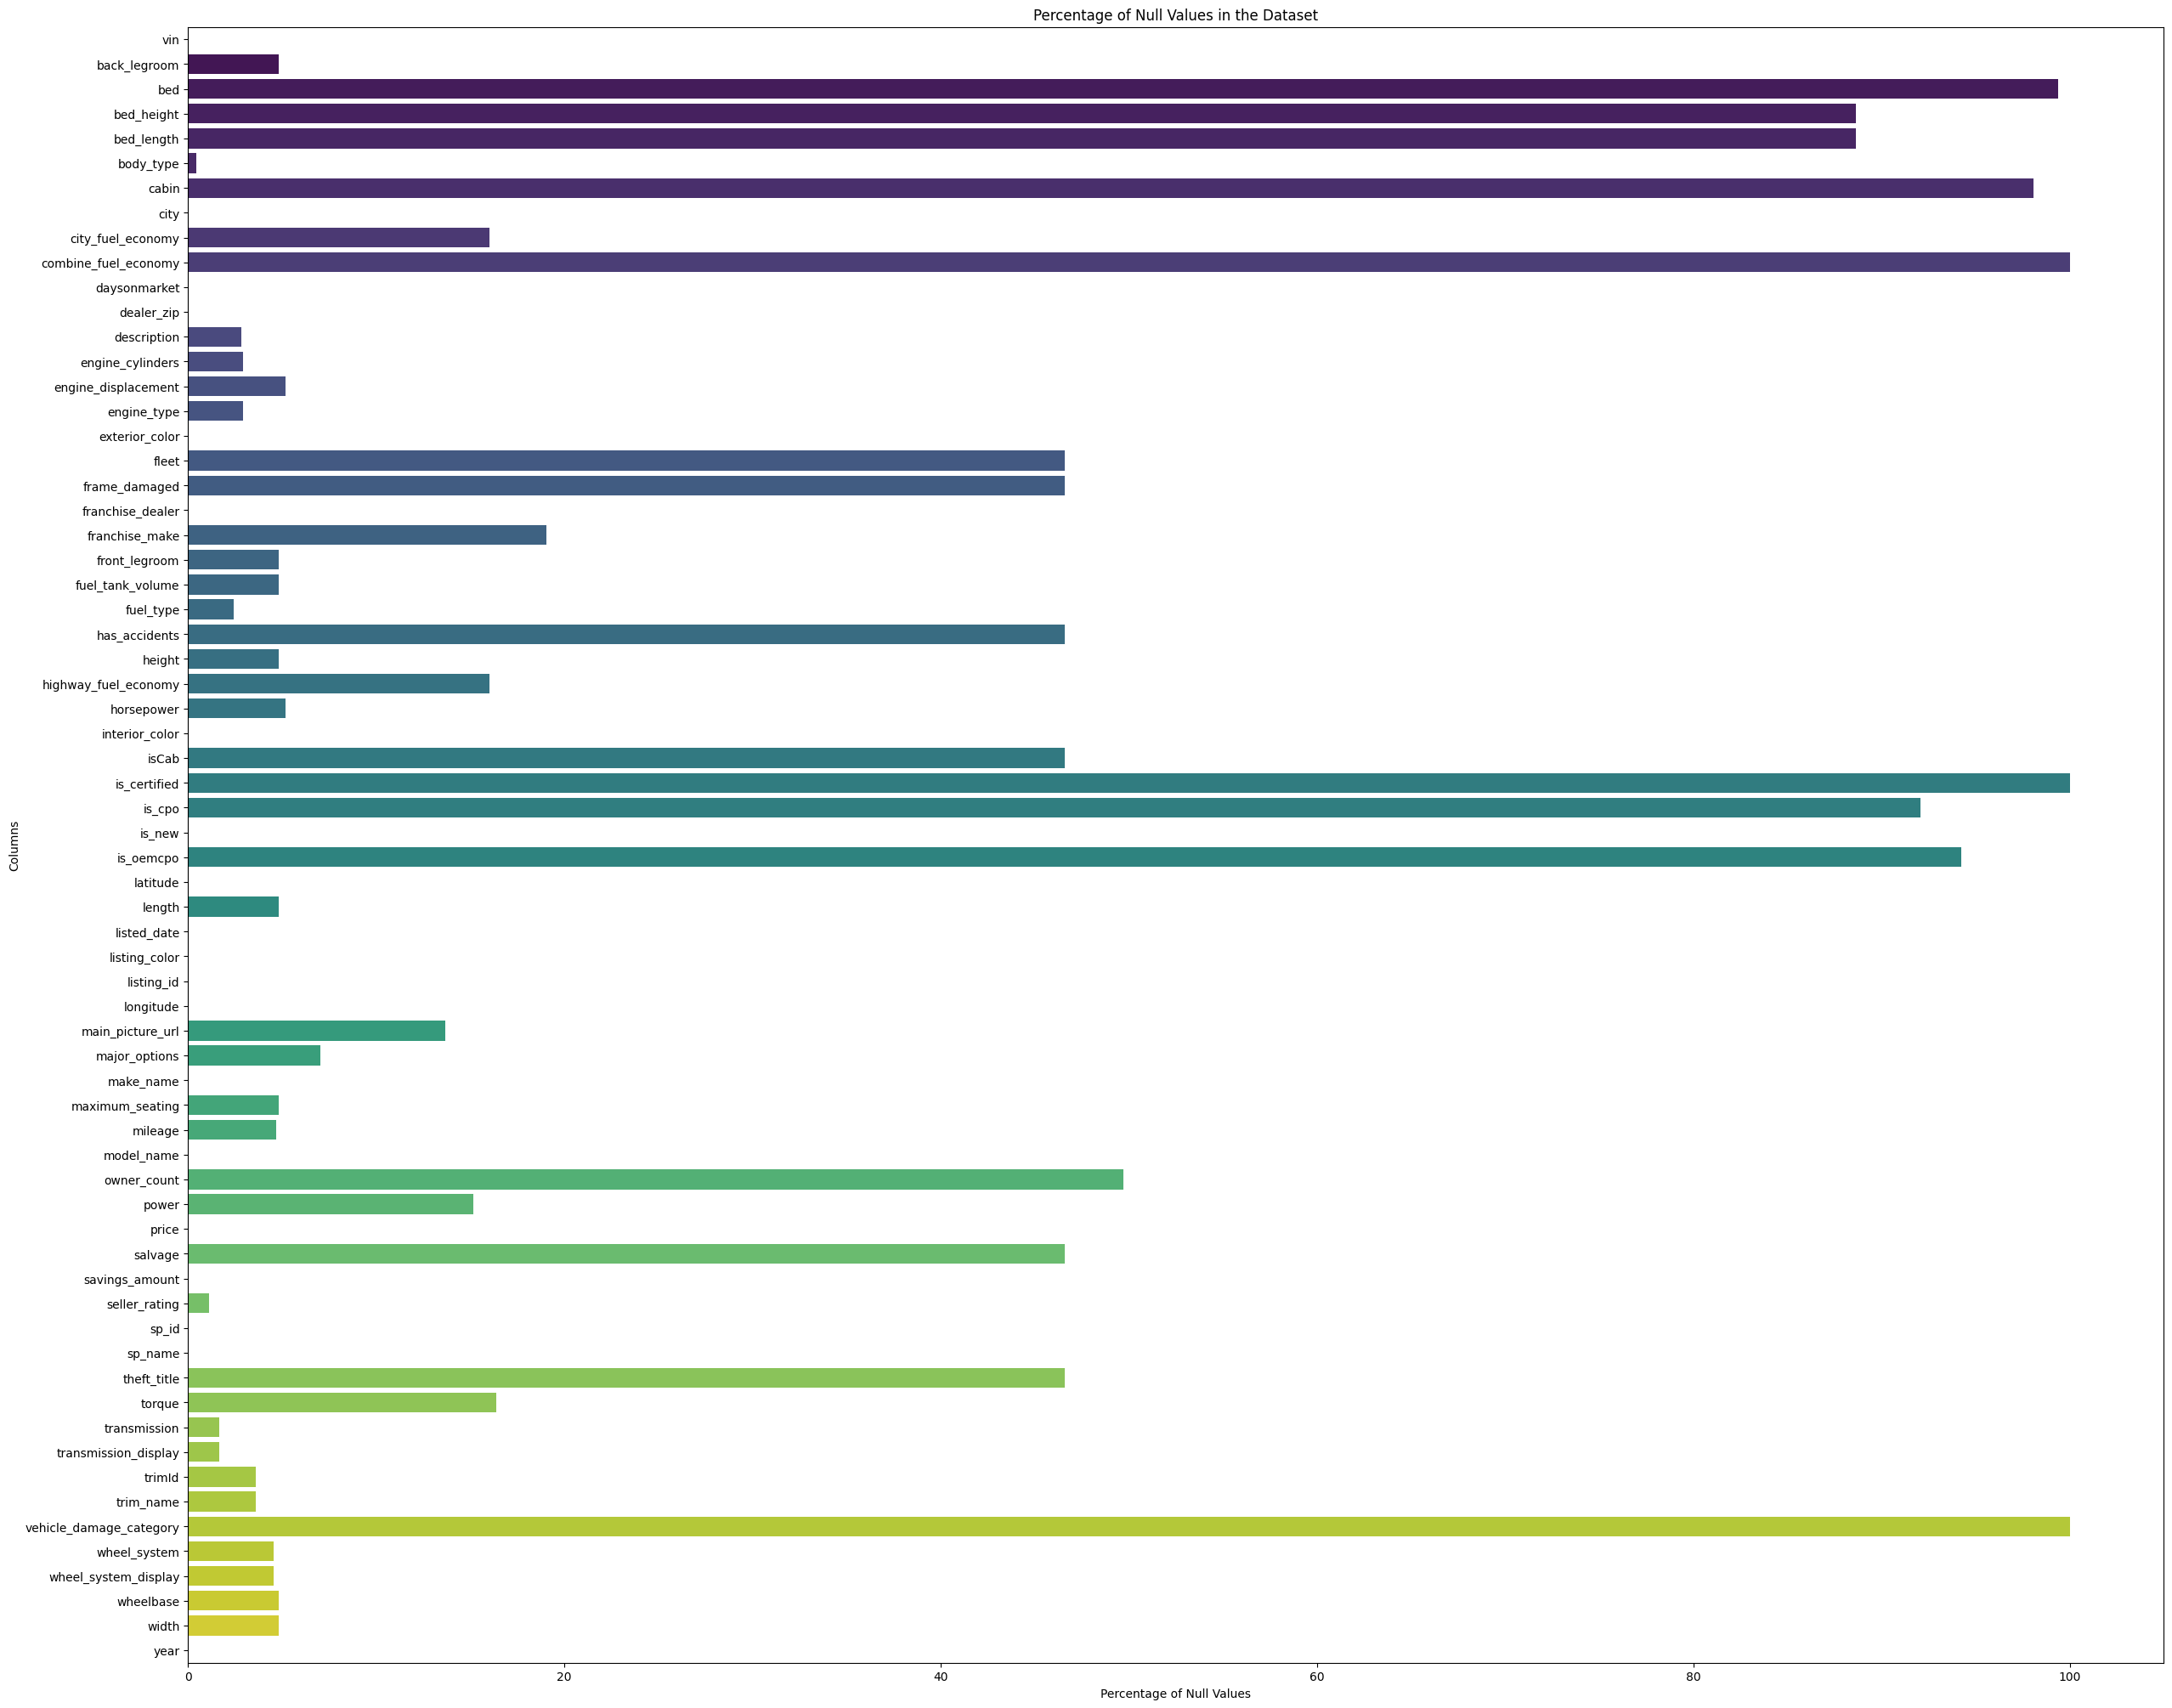

In [5]:
#Visualizuing the percentage of null values in each columns
null_p= (df.isnull().mean() * 100).round(2)
plt.figure(figsize=(30, 25))
sns.barplot(x=null_p.values, y=null_p.index, palette='viridis')
plt.xlabel('Percentage of Null Values')
plt.ylabel('Columns')
plt.title('Percentage of Null Values in the Dataset')
plt.show()

In [6]:
#Remove the columns which has high null values and the unwanted columns
df=df.drop(['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'sp_id', 'is_certified', 'latitude', 
            'listing_id', 'longitude','sp_id','vehicle_damage_category','combine_fuel_economy','trimId',
            'listing_id','cabin','fleet','frame_damaged','is_oemcpo','isCab','is_cpo','theft_title',
            'main_picture_url','dealer_zip','description','listed_date','sp_name','trim_name','transmission_display','transmission_display'],axis=1)

In [7]:
#Change the null values in the owner_count into zero
df['owner_count'].fillna(0,inplace=True)
df.describe(include='all').T

count unique  \
body_type               696987      9   
city                    700000   2902   
city_fuel_economy     587717.0    NaN   
daysonmarket          700000.0    NaN   
engine_cylinders        679517     33   
engine_displacement   663603.0    NaN   
engine_type             679517     33   
exterior_color          699998  12336   
franchise_dealer        700000      2   
franchise_make          566672     46   
front_legroom           666225     95   
fuel_tank_volume        666225    174   
fuel_type               682954      7   
has_accidents           373823      2   
height                  666225    459   
highway_fuel_economy  587717.0    NaN   
horsepower            663603.0    NaN   
interior_color          699992  17826   
is_new                  700000      2   
length                  666225    793   
listing_color           700000     15   
major_options           650890  90917   
make_name               700000     75   
maximum_seating         666225     12   
mileage               667335.0    NaN   
model_name              700000   1186   
owner_count           700000.0    NaN   
power                   593934   1815   
price                 700000.0    NaN   
salvage                 373823      2   
savings_amount        700000.0    NaN   
seller_rating         692151.0    NaN   
torque                  585421   1794   
transmission            688456      4   
wheel_system            668175      5   
wheel_system_display    668175      5   
wheelbase               666225    457   
width                   666225    275   
year                  700000.0    NaN   

                                                                 top    freq  \
body_type                                            SUV / Crossover  363911   
city                                                         Chicago    7866   
city_fuel_economy                                                NaN     NaN   
daysonmarket                                                     NaN     NaN   
engine_cylinders                                                  I4  346534   
engine_displacement                                              NaN     NaN   
engine_type                                                       I4  346534   
exterior_color                                                 Black   41476   
franchise_dealer                                                True  567171   
franchise_make                                                  Ford   90334   
front_legroom                                                40.9 in   52022   
fuel_tank_volume                                            13.2 gal   37608   
fuel_type                                                   Gasoline  621454   
has_accidents                                                  False  313964   
height                                                       66.1 in   22258   
highway_fuel_economy                                             NaN     NaN   
horsepower                                                       NaN     NaN   
interior_color                                                 Black  204017   
is_new                                                         False  363676   
length                                                      231.9 in   17709   
listing_color                                                  BLACK  151111   
major_options         ['Alloy Wheels', 'Bluetooth', 'Backup Camera']   20494   
make_name                                                       Ford  106627   
maximum_seating                                              5 seats  461360   
mileage                                                          NaN     NaN   
model_name                                                     F-150   23725   
owner_count                                                      NaN     NaN   
power                                             355 hp @ 5,600 RPM   17533   
price                                                           

In [8]:

#seperate the numerical values
num_col = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical Variables: ")
print(num_col)

Numerical Variables: 
['city_fuel_economy', 'daysonmarket', 'engine_displacement', 'highway_fuel_economy', 'horsepower', 'mileage', 'owner_count', 'price', 'savings_amount', 'seller_rating', 'year']


city_fuel_economy
Skew : 6.05


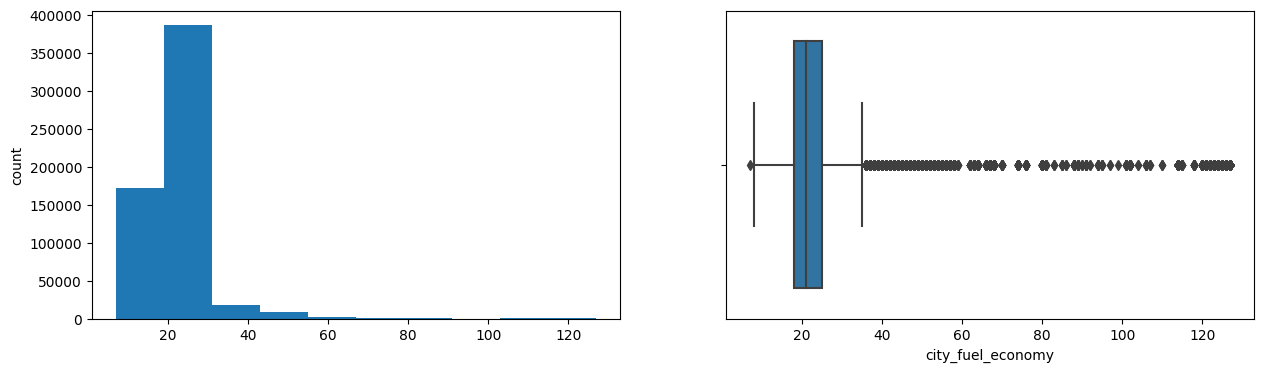

daysonmarket
Skew : 3.6


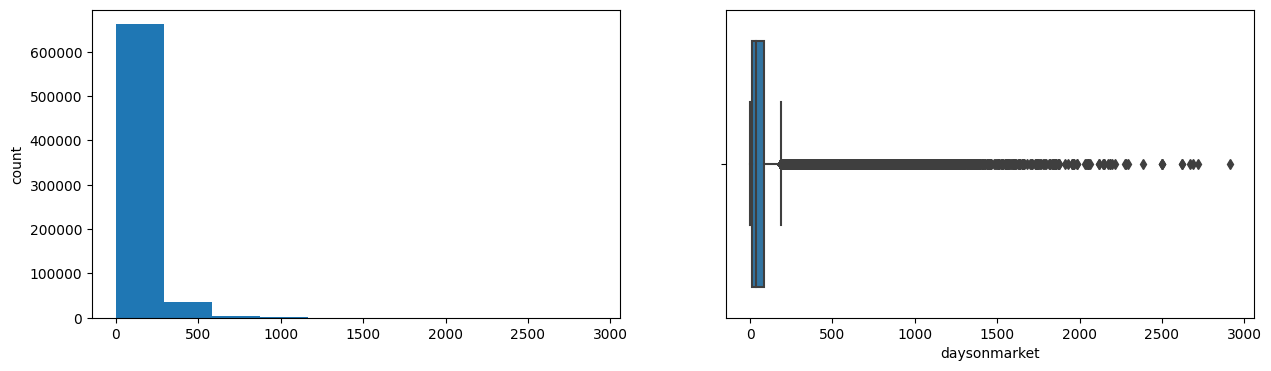

engine_displacement
Skew : 1.24


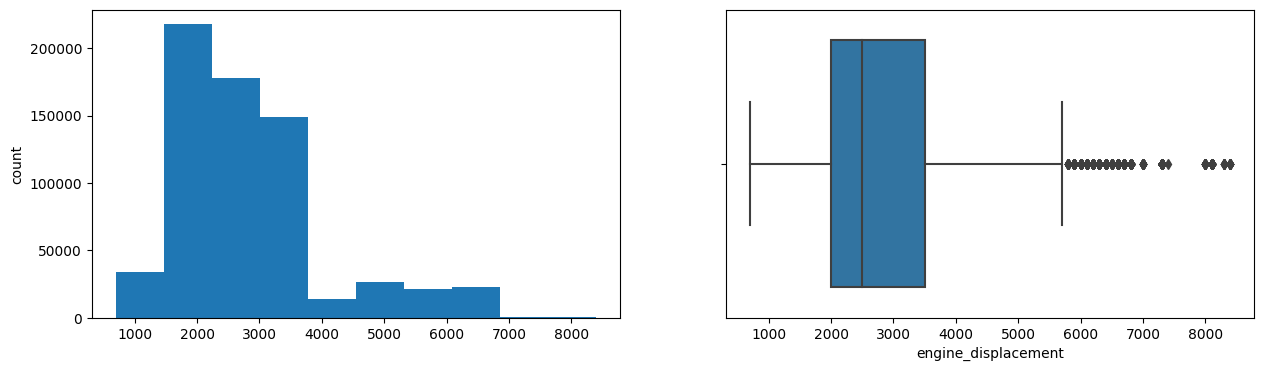

highway_fuel_economy
Skew : 3.66


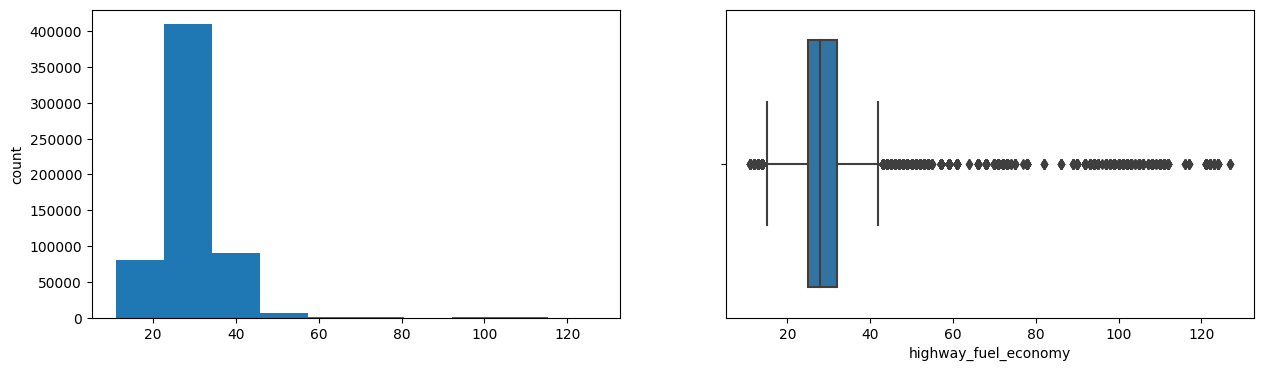

horsepower
Skew : 0.87


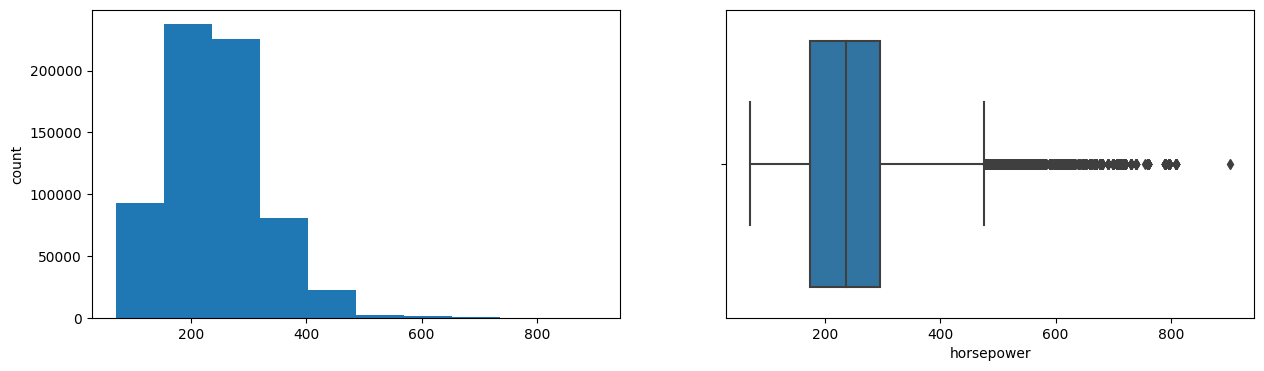

mileage
Skew : 3.27


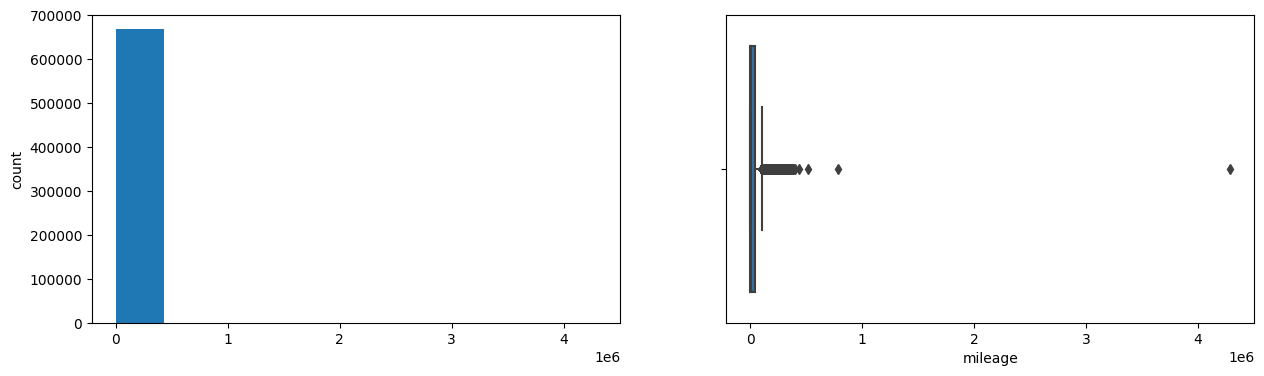

owner_count
Skew : 1.8


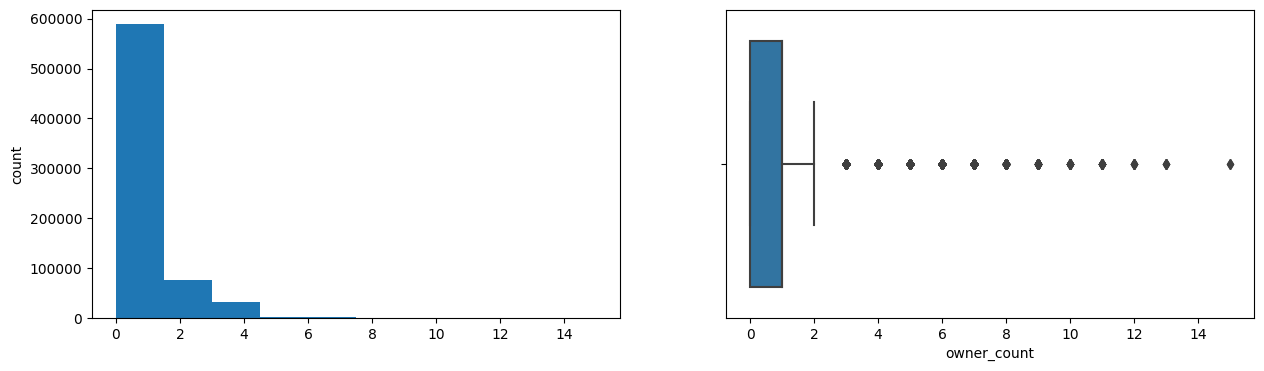

price
Skew : 17.77


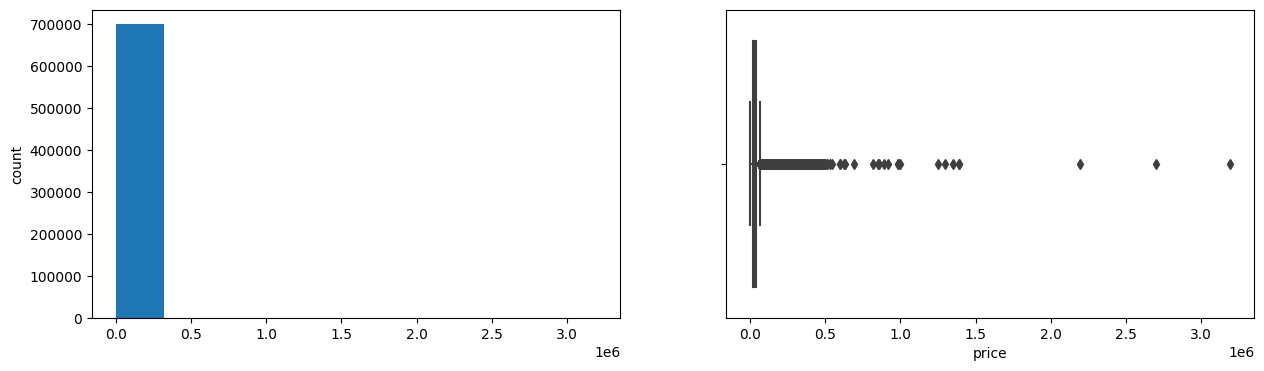

savings_amount
Skew : 13.87


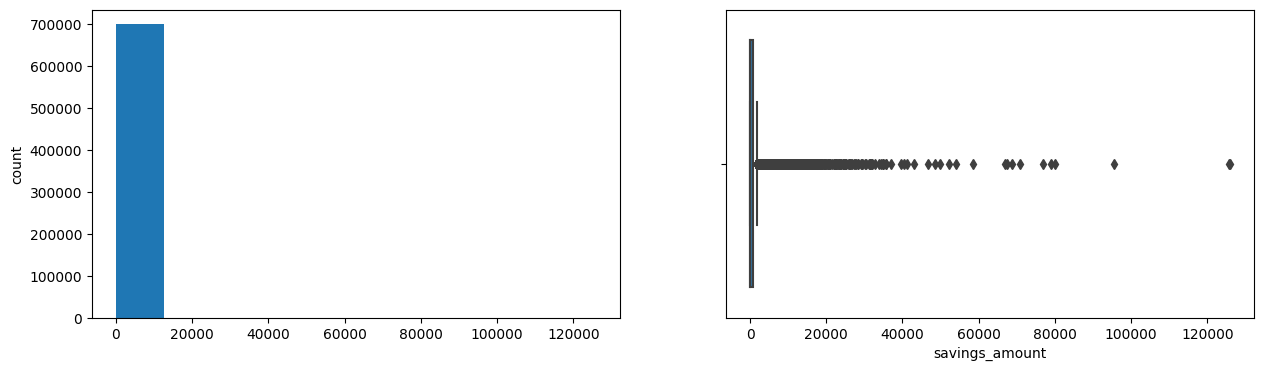

seller_rating
Skew : -1.47


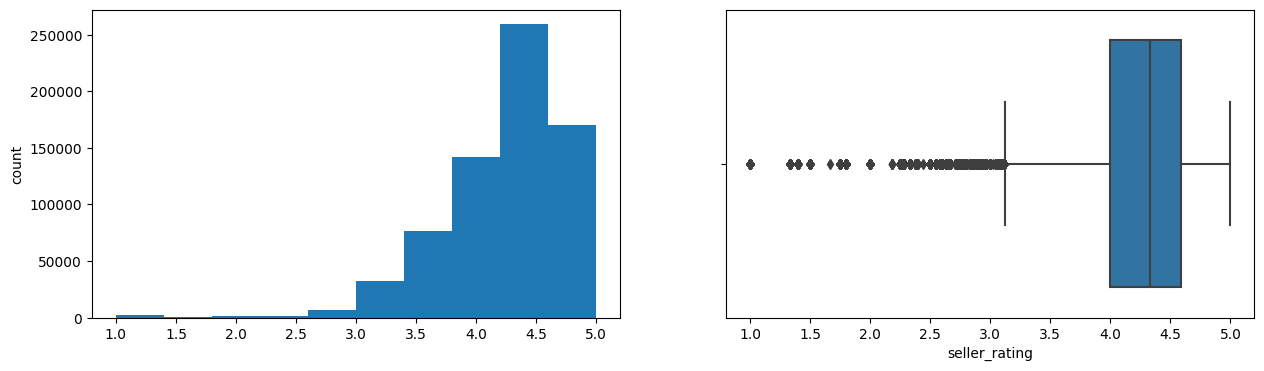

year
Skew : -4.3


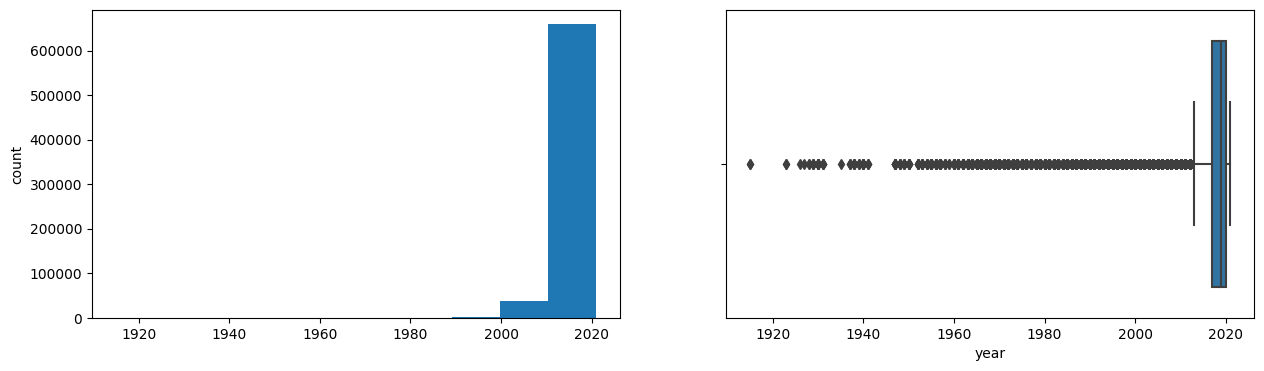

In [9]:
#visualize the numerical values
for i in num_col:
    print(i)
    print('Skew :', round(df[i].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[i].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[i])
    plt.show()

In [10]:
# Select categorical columns
cat_cols = ['body_type', 'engine_type', 'franchise_make',
                       'fuel_type', 'transmission', 'wheel_system']
# Set the figure size for individual plots
figsize = (100, 80)
# Plot counts for each categorical column
for i in cat_cols:
    plt.figure(figsize=figsize)
    df[i].value_counts().plot.bar(fontsize=56)
    plt.title(f"{i} Counts", fontsize=54)
    plt.xlabel(i, fontsize=54)
    plt.ylabel('Count', fontsize=54)
    sns.despine()
    plt.show()

In [11]:
# Set the threshold for null values
threshold = 0.5  
# Calculate the maximum number of null values allowed per row
max_null= len(df.columns) * threshold

# Filter out rows exceeding the threshold
df_filter = df[df.isnull().sum(axis=1) <= max_null]
df_filter.isnull().sum()


body_type                 1894
city                         0
city_fuel_economy       102626
daysonmarket                 0
engine_cylinders         10868
engine_displacement      26740
engine_type              10868
exterior_color               2
franchise_dealer             0
franchise_make          132478
front_legroom            24118
fuel_tank_volume         24118
fuel_type                 7532
has_accidents           317442
height                   24118
highway_fuel_economy    102626
horsepower               26740
interior_color               7
is_new                       0
length                   24118
listing_color                0
major_options            43468
make_name                    0
maximum_seating          24118
mileage                  31504
model_name                   0
owner_count                  0
power                    96409
price                        0
salvage                 317442
savings_amount               0
seller_rating             7704
torque  

In [12]:
# convert the object and boolean data into numerical using LabelEncoder
df_f=df_filter .copy()
le = LabelEncoder()
for i in df_f.columns:
    if df_f[i].dtype == 'object':
        df_f[i] = le.fit_transform(df_f[i])
    elif df_f[i].dtype == 'bool':
        df_f[i] = df_f[i].astype(int)  
df_f.head()

body_type  city  city_fuel_economy  daysonmarket  engine_cylinders  \
0          5   132                NaN           522                 5   
1          5  2264                NaN           207                 5   
2          6  1020               17.0          1233                 0   
3          5  2264                NaN           196                19   
4          5  2264                NaN           137                 5   

   engine_displacement  engine_type  exterior_color  franchise_dealer  \
0               1300.0            5           10120                 1   
1               2000.0            5            7296                 1   
2               2500.0            0            7445                 1   
3               3000.0           19            4155                 1   
4               2000.0            5            7296                 1   

   franchise_make  ...  salvage  savings_amount  seller_rating  torque  \
0              20  ...        2               0            2.8     484   
1              23  ...        2               0            3.0     951   
2              11  ...        0               0            NaN    1080   
3              23  ...        2               0            3.0    1260   
4              23  ...        2               0            3.0     951   

   transmission  wheel_system  wheel_system_display  wheelbase  width  year  
0             0             3                     3         12    162  2019  
1             0             2                     1         75    219  2020  
2             3             2                     1         43    155  2016  
3             0             2                     1        142    235  2020  
4             0             2                     1         75    219  2020  

[5 rows x 39 columns]

In [13]:

# Calculate correlation matrix
corr_m = df_f.corr()
corr = corr_m['price'].abs().sort_values(ascending=False)
print(corr)

price                   1.000000
horsepower              0.587375
mileage                 0.460484
year                    0.414174
owner_count             0.392994
torque                  0.384272
power                   0.382094
is_new                  0.381089
salvage                 0.363450
width                   0.331603
engine_displacement     0.327204
has_accidents           0.322055
fuel_tank_volume        0.316255
franchise_dealer        0.303410
engine_cylinders        0.298042
engine_type             0.298042
length                  0.295400
highway_fuel_economy    0.234306
franchise_make          0.232695
wheelbase               0.231054
wheel_system            0.223789
height                  0.213298
body_type               0.165363
city_fuel_economy       0.162068
wheel_system_display    0.150032
maximum_seating         0.106702
daysonmarket            0.100358
fuel_type               0.098606
major_options           0.080307
transmission            0.065816
seller_rat

In [14]:

# Filter correlations greater than 0.10
selected_corr = corr[corr > 0.10]
df_new = df_f[selected_corr.index]
df_new.head()


price  horsepower  mileage  year  owner_count  torque  power  is_new  \
0  23141.0       177.0      7.0  2019          0.0     484    389       1   
1  46500.0       246.0      8.0  2020          0.0     951    835       1   
2  46995.0       305.0      NaN  2016          3.0    1080   1163       0   
3  67430.0       340.0     11.0  2020          0.0    1260   1289       1   
4  48880.0       246.0      7.0  2020          0.0     951    835       1   

   salvage  width  ...  highway_fuel_economy  franchise_make  wheelbase  \
0        2    162  ...                   NaN              20         12   
1        2    219  ...                   NaN              23         75   
2        0    155  ...                  23.0              11         43   
3        2    235  ...                   NaN              23        142   
4        2    219  ...                   NaN              23         75   

   wheel_system  height  body_type  city_fuel_economy  wheel_system_display  \
0             3     257          5                NaN                     3   
1             2     272          5                NaN                     1   
2             2     174          6               17.0                     1   
3             2     322          5                NaN                     1   
4             2     272          5                NaN                     1   

   maximum_seating  daysonmarket  
0                7           522  
1                9           207  
2                7          1233  
3                9           196  
4                9           137  

[5 rows x 27 columns]

In [15]:
#remove the null values 
df_f= df_new.dropna()
print(df_f.isnull().sum())
len(df_f)

price                   0
horsepower              0
mileage                 0
year                    0
owner_count             0
torque                  0
power                   0
is_new                  0
salvage                 0
width                   0
engine_displacement     0
has_accidents           0
fuel_tank_volume        0
franchise_dealer        0
engine_cylinders        0
engine_type             0
length                  0
highway_fuel_economy    0
franchise_make          0
wheelbase               0
wheel_system            0
height                  0
body_type               0
city_fuel_economy       0
wheel_system_display    0
maximum_seating         0
daysonmarket            0
dtype: int64


557686

In [16]:
# Prepare data for modeling
x = df_f.drop(['price'],axis=1)
y = df_f['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)


In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(y_pred)

[55170.62       36690.14       24803.78055556 ... 14268.95
 22832.81       45815.07768254]


In [18]:
print(r2_score(y_pred, y_test))

0.9114742344513693


Factors affecting the price of the car and how much those factors affect

In [19]:
# To analysis the important features using the RandomForestRegressor model
imp_features = model.feature_importances_

imp_features_list = pd.Series(imp_features, index=x_train.columns)
imp_features_list = imp_features_list.sort_values(ascending=False)

# Print the top features
print(imp_features_list)

horsepower              0.400580
mileage                 0.230112
city_fuel_economy       0.068641
year                    0.054218
length                  0.038203
height                  0.036916
daysonmarket            0.031497
engine_displacement     0.020175
fuel_tank_volume        0.019203
width                   0.013205
torque                  0.012534
wheelbase               0.011841
highway_fuel_economy    0.010521
franchise_make          0.009275
power                   0.006539
wheel_system            0.005607
wheel_system_display    0.005297
owner_count             0.004926
engine_cylinders        0.004855
maximum_seating         0.004481
is_new                  0.003406
engine_type             0.003330
body_type               0.002239
has_accidents           0.001334
franchise_dealer        0.000565
salvage                 0.000500
dtype: float64


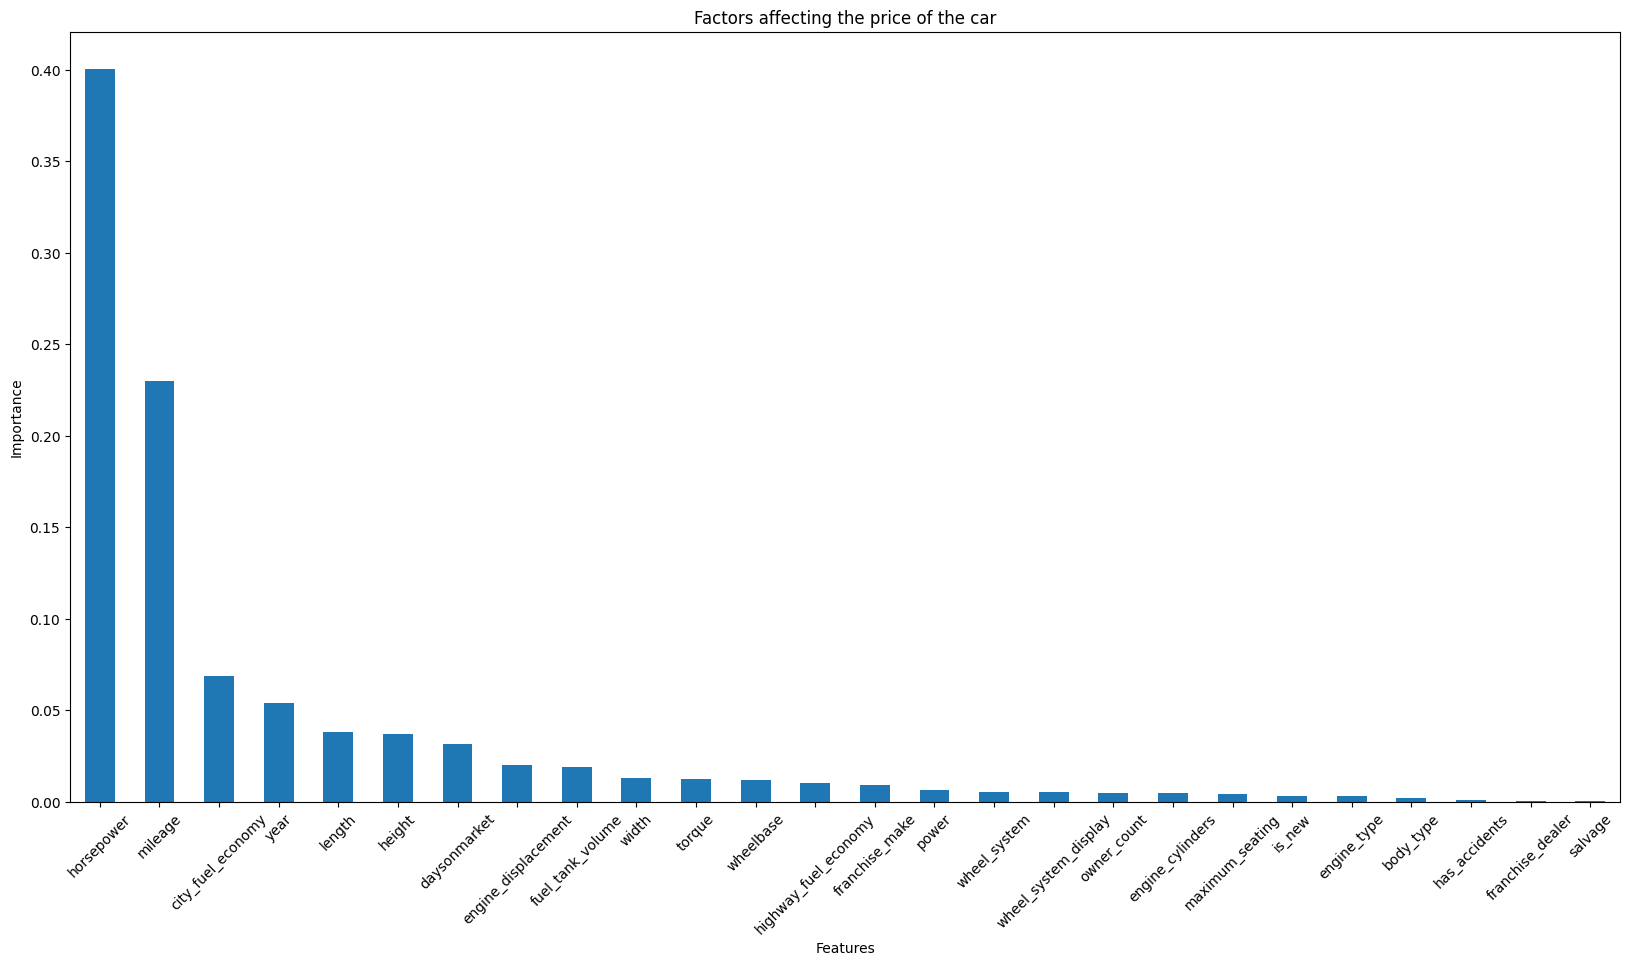

In [20]:
#Visualization of factors affecting the price
top_features = imp_features_list
plt.figure(figsize=(20, 10))
top_features.plot(kind='bar')
plt.title('Factors affecting the price of the car')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


In [21]:
#Add the new column which conatins the age of car
from datetime import date
df['Car_Age']=date.today().year-df['year']
df.head()

body_type      city  city_fuel_economy  daysonmarket  \
0  SUV / Crossover   Bayamon                NaN           522   
1  SUV / Crossover  San Juan                NaN           207   
2            Sedan  Guaynabo               17.0          1233   
3  SUV / Crossover  San Juan                NaN           196   
4  SUV / Crossover  San Juan                NaN           137   

  engine_cylinders  engine_displacement engine_type exterior_color  \
0               I4               1300.0          I4   Solar Yellow   
1               I4               2000.0          I4   Narvik Black   
2               H4               2500.0          H4           None   
3               V6               3000.0          V6     Eiger Gray   
4               I4               2000.0          I4   Narvik Black   

   franchise_dealer franchise_make  ... savings_amount seller_rating  \
0              True           Jeep  ...              0           2.8   
1              True     Land Rover  ...              0           3.0   
2              True           FIAT  ...              0           NaN   
3              True     Land Rover  ...              0           3.0   
4              True     Land Rover  ...              0           3.0   

                  torque transmission wheel_system  wheel_system_display  \
0  200 lb-ft @ 1,750 RPM            A          FWD     Front-Wheel Drive   
1  269 lb-ft @ 1,400 RPM            A          AWD       All-Wheel Drive   
2  290 lb-ft @ 4,000 RPM            M          AWD       All-Wheel Drive   
3  332 lb-ft @ 3,500 RPM            A          AWD       All-Wheel Drive   
4  269 lb-ft @ 1,400 RPM            A          AWD       All-Wheel Drive   

   wheelbase    width  year Car_Age  
0   101.2 in  79.6 in  2019       5  
1   107.9 in  85.6 in  2020       4  
2   104.3 in  78.9 in  2016       8  
3     115 in  87.4 in  2020       4  
4   107.9 in  85.6 in  2020       4  

[5 rows x 40 columns]

The prices for a Nissan V/S Ford on similar age and mileage

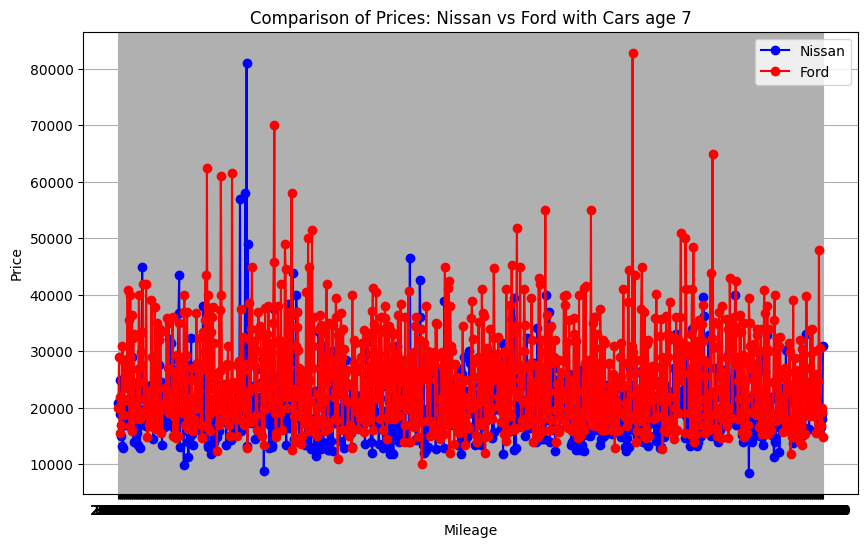

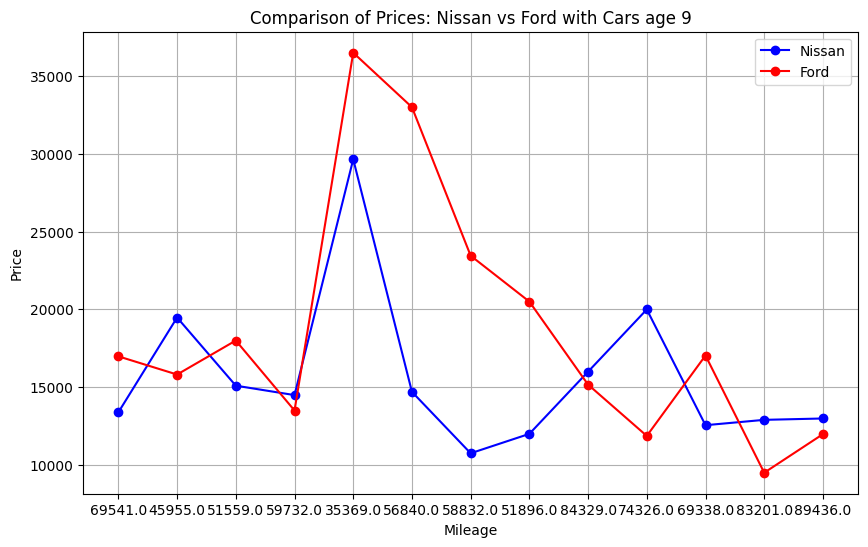

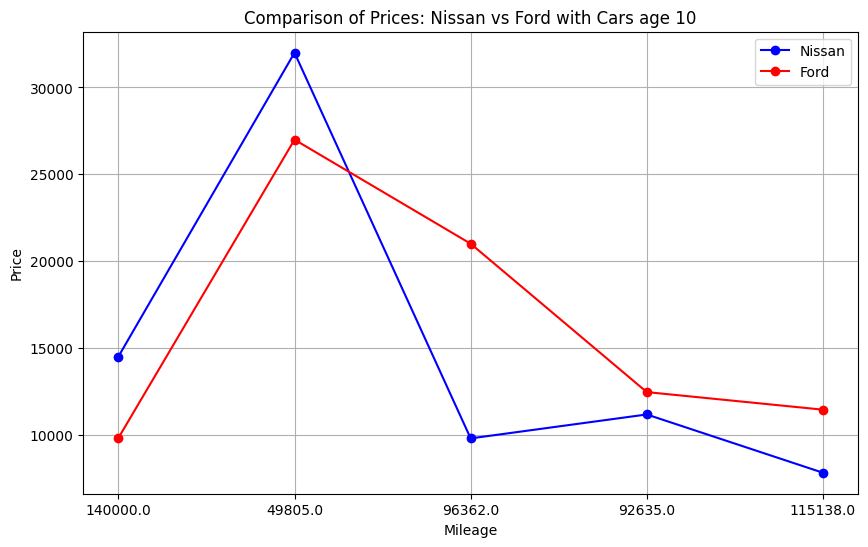

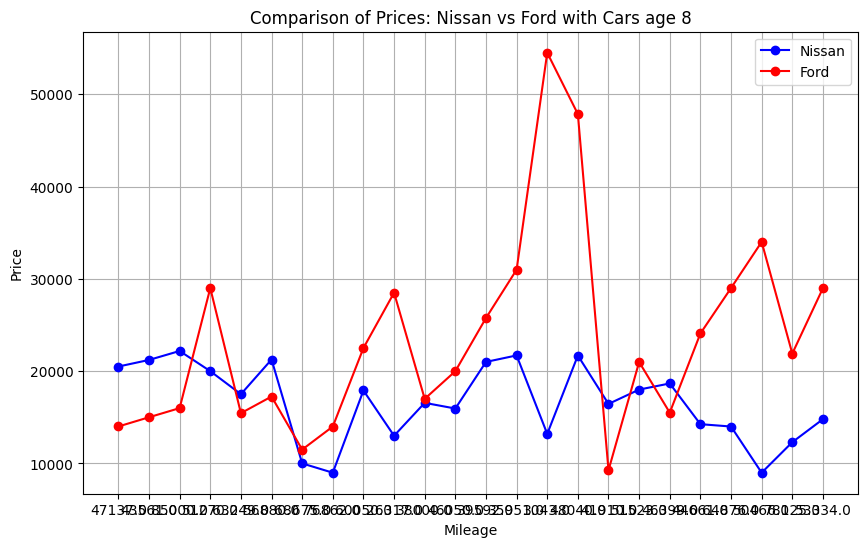

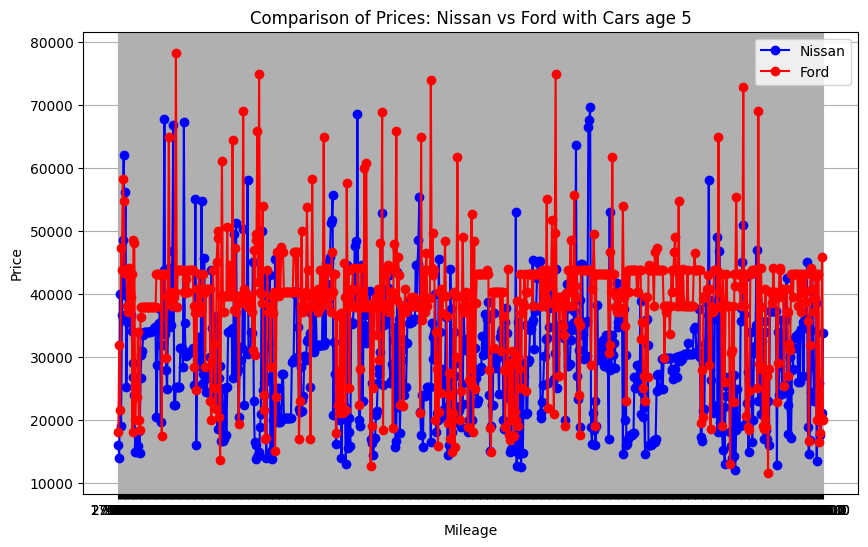

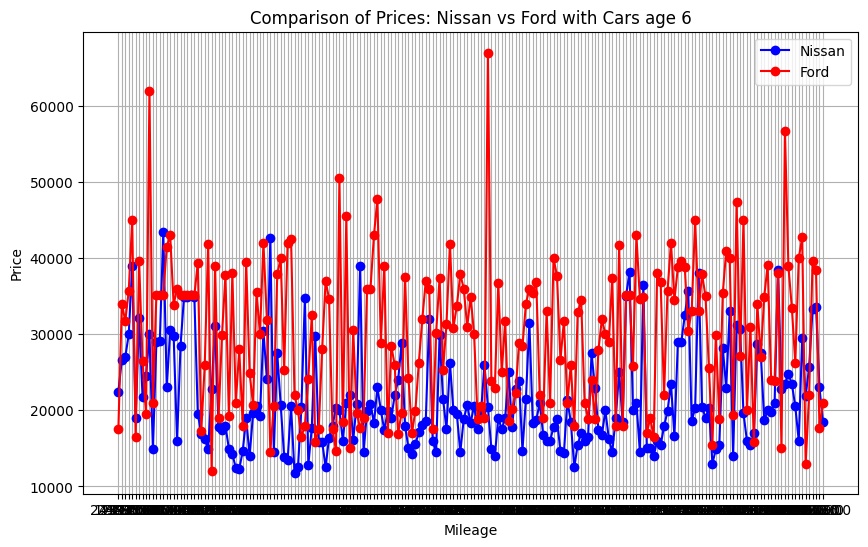

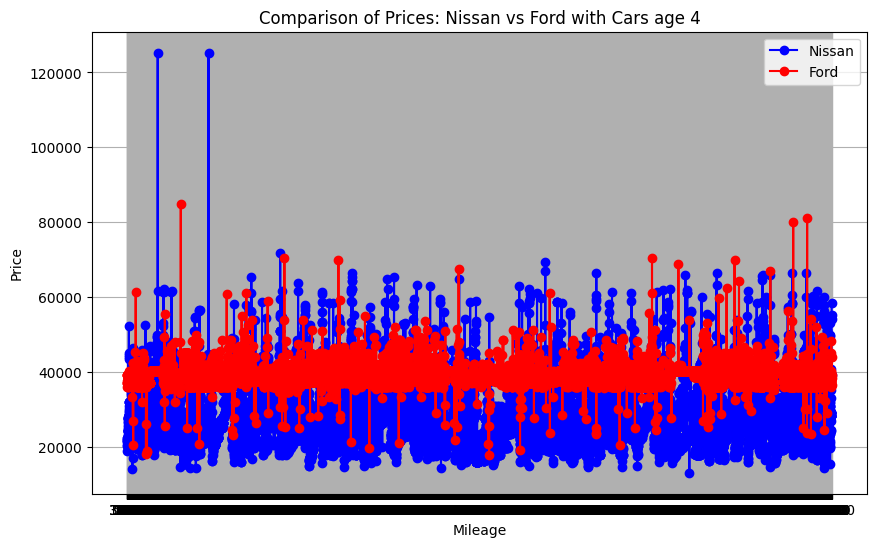

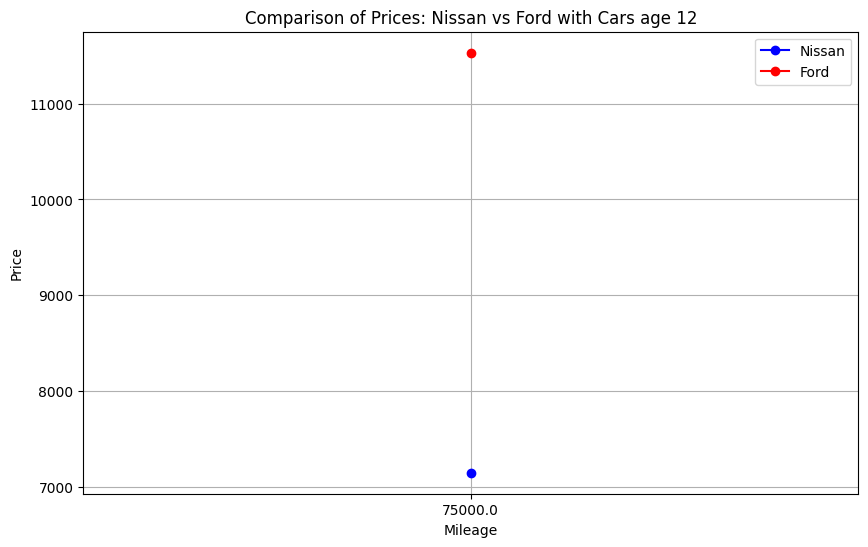

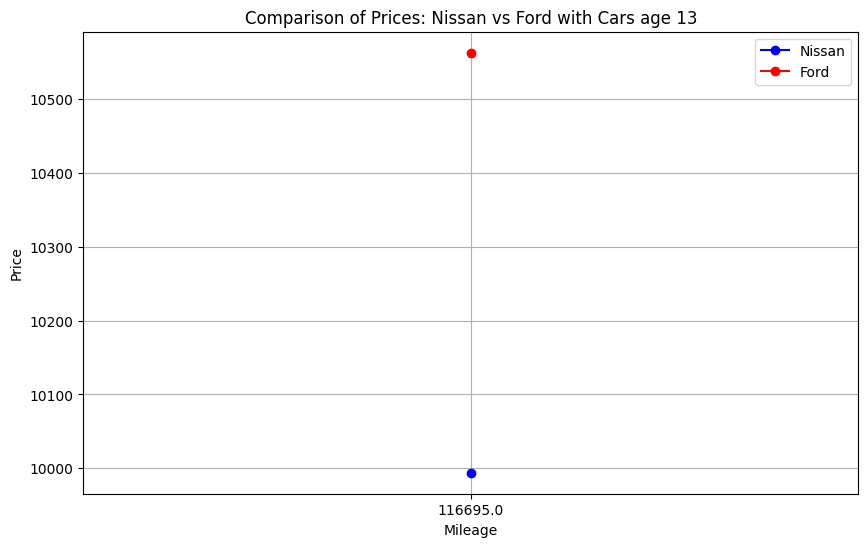

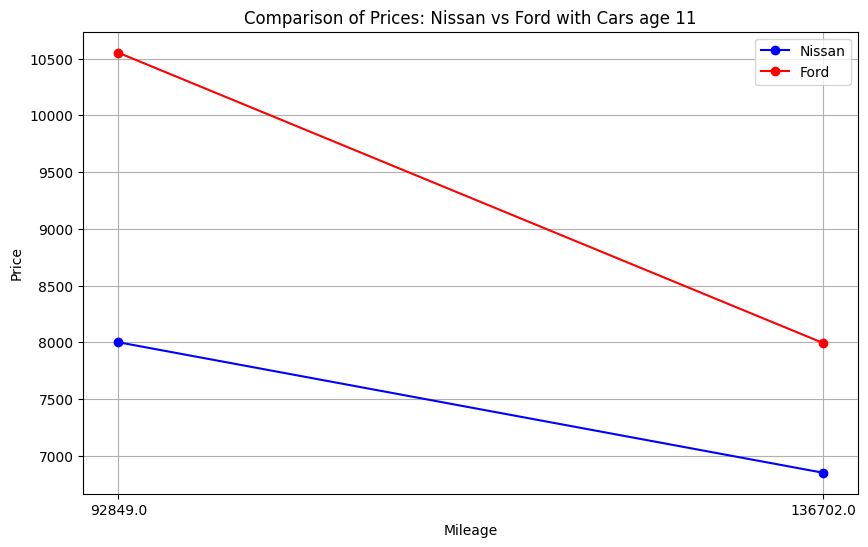

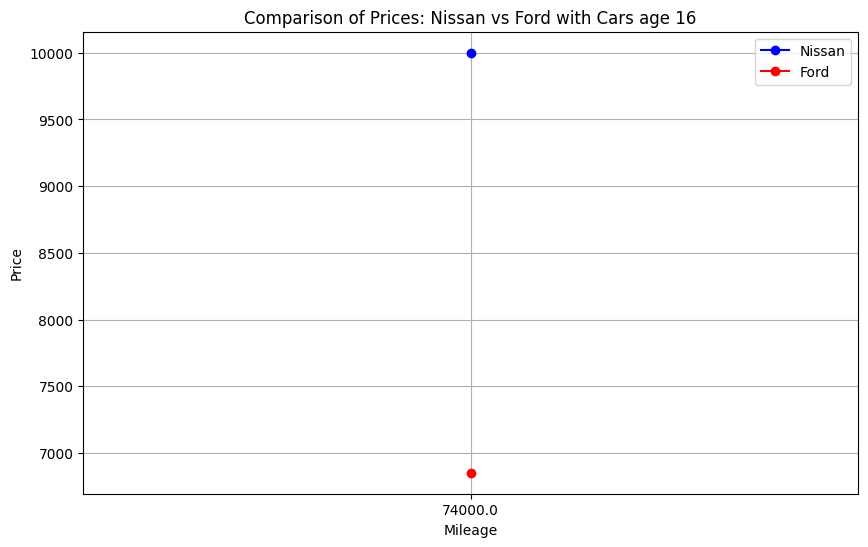

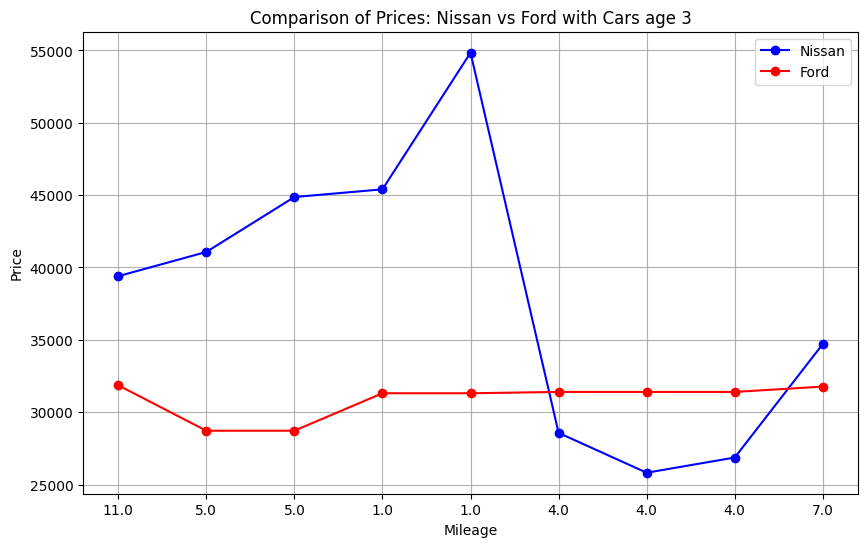

In [27]:
# Separate Nissan and Ford data
df_nissan = df[df['franchise_make'] == 'Nissan'][['Car_Age', 'mileage', 'franchise_make','price']]
df_ford = df[df['franchise_make'] == 'Ford'][['Car_Age', 'mileage', 'franchise_make','price']]
age=df_nissan['Car_Age'].unique()

def find_similar_ford(age, mileage):
    similar_ford = df_ford[(df_ford['Car_Age'] == age) & (df_ford['mileage'] == mileage)]
    if not similar_ford.empty:
        return similar_ford['price'].mean()
    else:
        return None
    
#Iterate over each age in the list and analyze matching Nissan cars against similar Ford cars in terms of age and mileage
for i in age:
    nissan_prices=[]
    ford_prices=[]
    mileages = []
    for idx, nissan_car in df_nissan.iterrows():
        if nissan_car['Car_Age']==i:
            mileage = nissan_car['mileage']
            ford_price = find_similar_ford(i, mileage)
            if ford_price is not None:
                nissan_prices.append(nissan_car['price'])
                ford_prices.append(ford_price)
                mileages.append(mileage)
    
    if not nissan_prices or not ford_prices:
        continue
    
    #Visualize the price of Nissan Vs Ford with similar age and mileage
    plt.figure(figsize=(10, 6))

    index = np.arange(len(nissan_prices))

    plt.plot(index, nissan_prices, marker='o', linestyle='-', color='b', label='Nissan')
    plt.plot(index, ford_prices, marker='o', linestyle='-', color='r', label='Ford')

    plt.xlabel('Mileage')
    plt.ylabel('Price')
    plt.title('Comparison of Prices: Nissan vs Ford with Cars age {}'.format(i))
    plt.xticks(index, mileages)
    plt.legend()
    plt.grid(True)
    plt.show()

ANOVA Result:
F-statistic: 20530.945282980632
p-value: 0.0


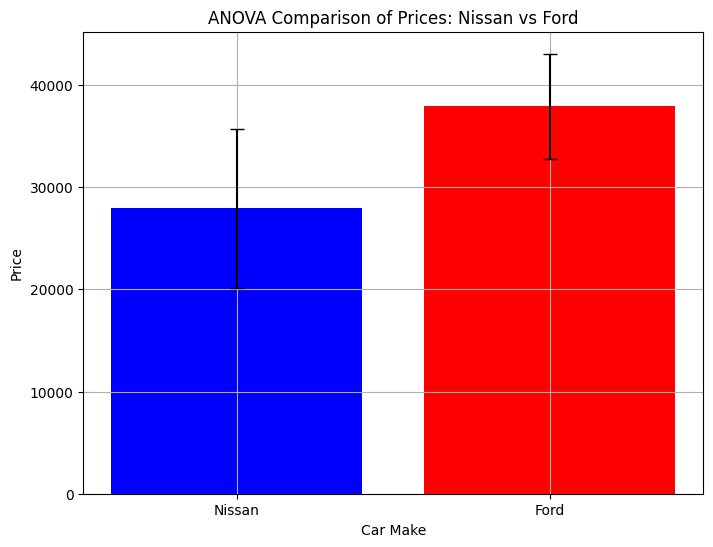

In [28]:

# ANOVA test
nissan_prices_all = []
ford_prices_all = []

for i in age:
    nissan_prices = []
    ford_prices = []
    for idx, nissan_car in df_nissan.iterrows():
        if nissan_car['Car_Age'] == i:
            mileage = nissan_car['mileage']
            ford_price = find_similar_ford(i, mileage)
            if ford_price is not None:
                nissan_prices.append(nissan_car['price'])
                ford_prices.append(ford_price)
    
    if nissan_prices and ford_prices:
        nissan_prices_all.extend(nissan_prices)
        ford_prices_all.extend(ford_prices)


result= f_oneway(nissan_prices_all, ford_prices_all)
print("ANOVA Result:")
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

# Visualization: ANOVA comparison
plt.figure(figsize=(8, 6))

plt.bar(['Nissan', 'Ford'], [np.mean(nissan_prices_all), np.mean(ford_prices_all)], 
        yerr=[np.std(nissan_prices_all), np.std(ford_prices_all)], 
        capsize=5, color=['blue', 'red'])

plt.xlabel('Car Make')
plt.ylabel('Price')  
plt.title('ANOVA Comparison of Prices: Nissan vs Ford')
plt.grid(True)
plt.show()